<a href="https://colab.research.google.com/github/zahraeissa/Machine-Learning-Projects/blob/main/KNN_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = "/content/drive/MyDrive/adult (2).csv"

In [ ]:
data=pd.read_csv(path)

In [ ]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [ ]:
data.shape

(48842, 15)

In [ ]:
cat_data = [col for col in data.columns if data[col].dtype==object]
print(cat_data)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [ ]:
num_data = [col for col in data.columns if data[col].dtype!=object]
print(num_data)

['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [ ]:
for col in cat_data:
  print(col,':',data[col].unique(),'\n')

workclass : ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education : ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool'] 

marital-status : ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] 

occupation : ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces'] 

relationship : ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative'] 

race : ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'] 

gender : ['Male' 'Female'] 

native-country : ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ire

In [ ]:
for col in cat_data:
  data[col].replace('?',np.nan,inplace=True)

/tmp/ipython-input-152230770.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace('?',np.nan,inplace=True)


In [ ]:
for col in cat_data:
  print(col,':',data[col].unique(),'\n')

workclass : ['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education : ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool'] 

marital-status : ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] 

occupation : ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' nan
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces'] 

relationship : ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative'] 

race : ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'] 

gender : ['Male' 'Female'] 

native-country : ['United-States' nan 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ire

In [ ]:
for col in num_data:
  print(col,':',data[col].nunique(),'\n')

age : 74 

fnlwgt : 28523 

educational-num : 16 

capital-gain : 123 

capital-loss : 99 

hours-per-week : 96 



In [ ]:
data.duplicated().sum()

np.int64(52)

In [ ]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [ ]:
data.isnull().sum()

,0
age,0
workclass,2795
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2805
relationship,0
race,0
gender,0


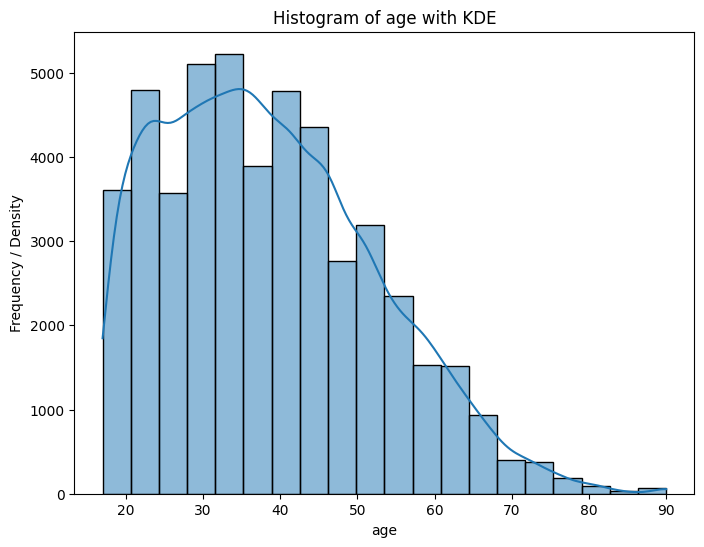

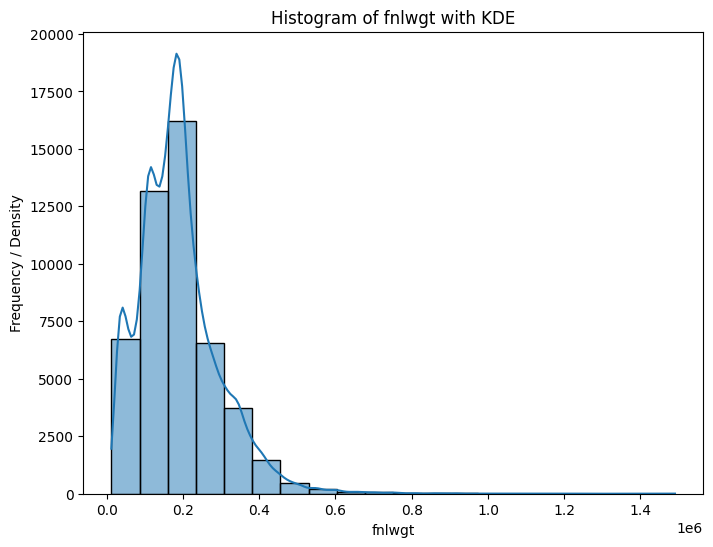

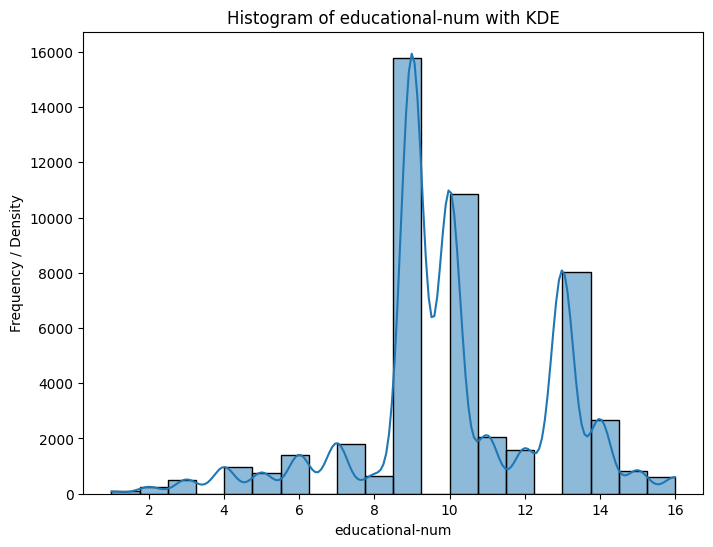

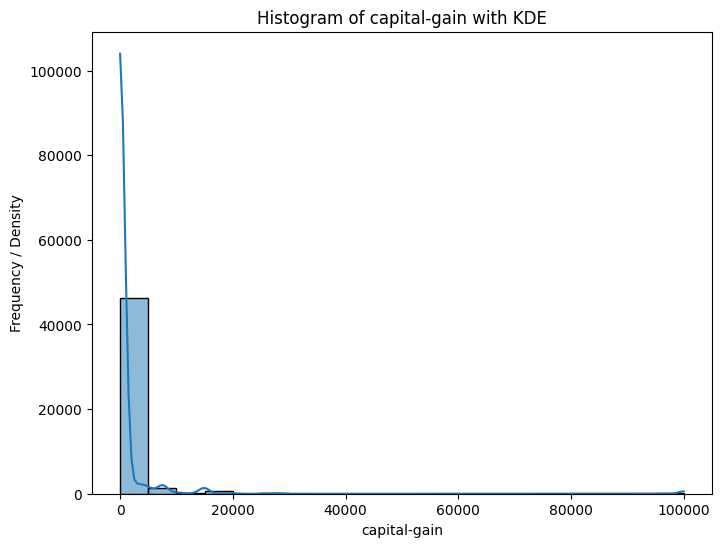

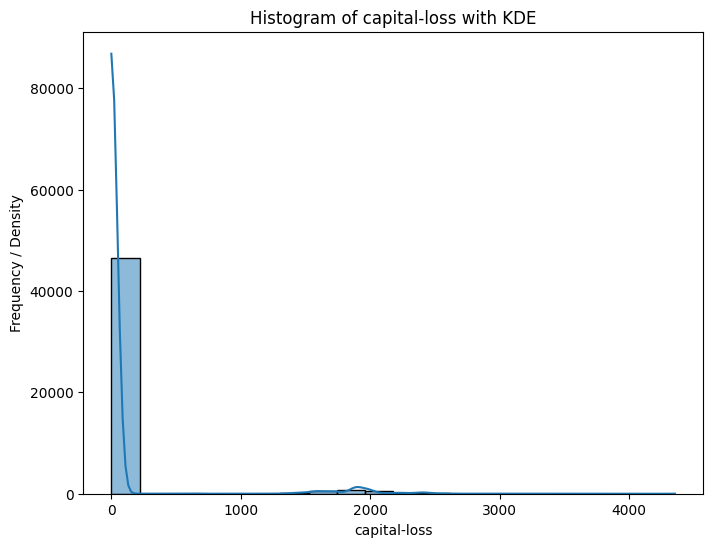

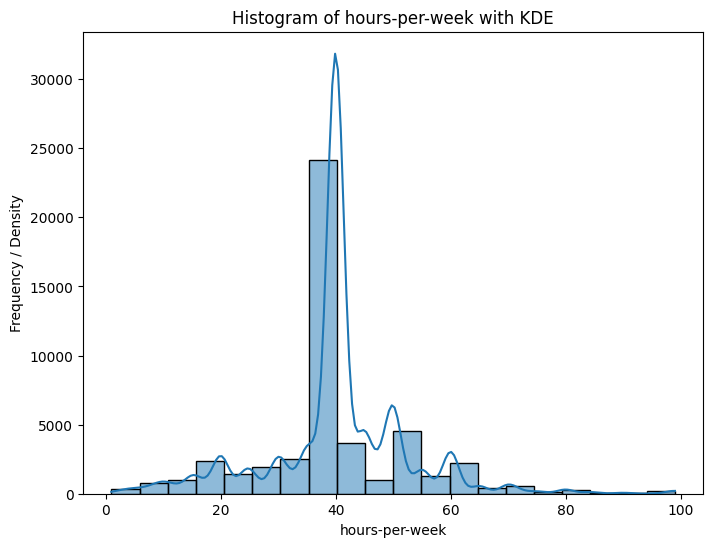

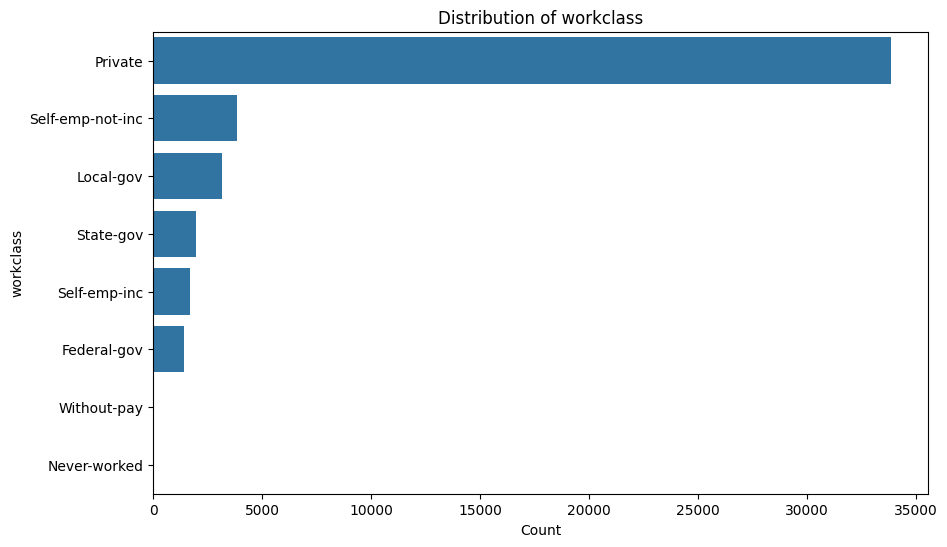

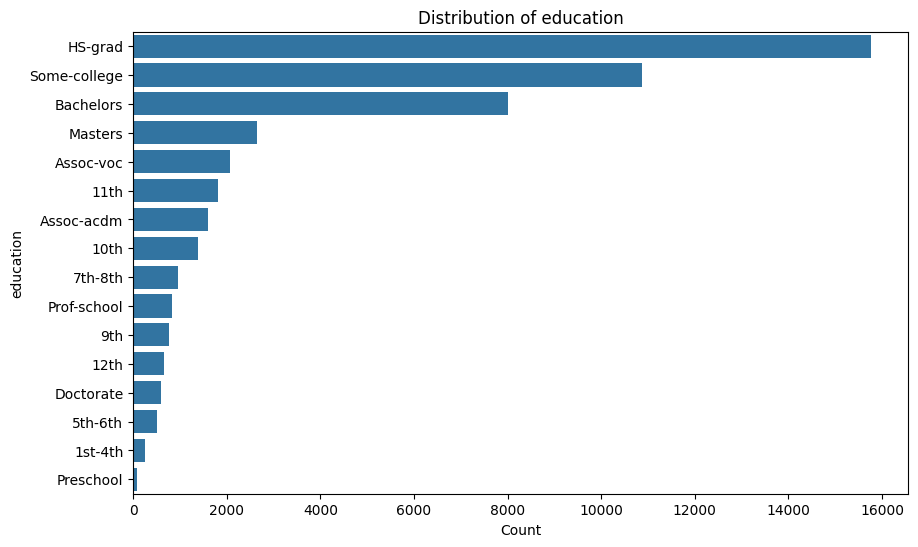

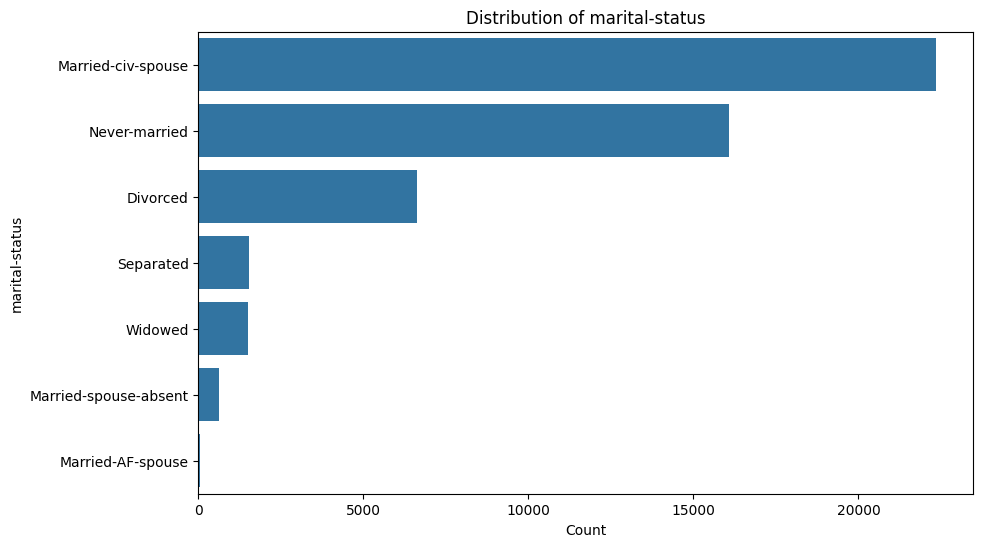

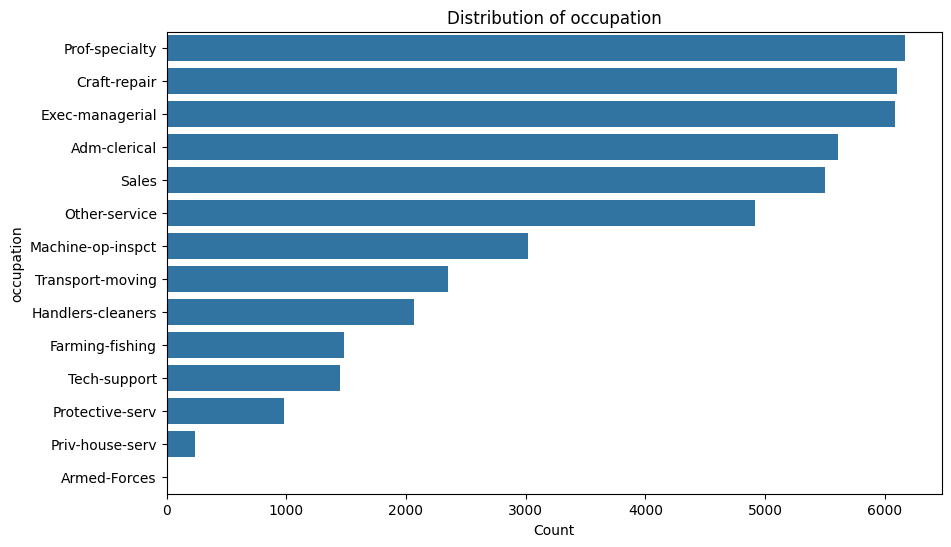

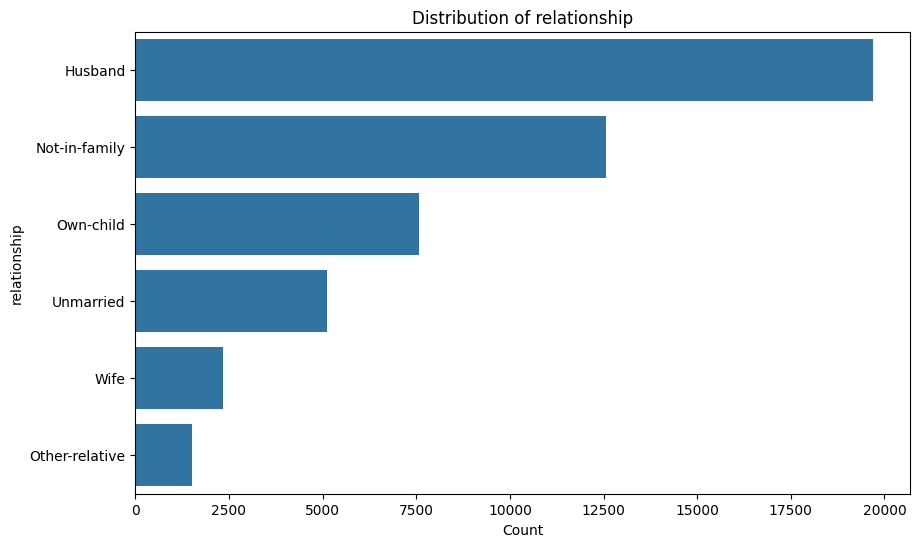

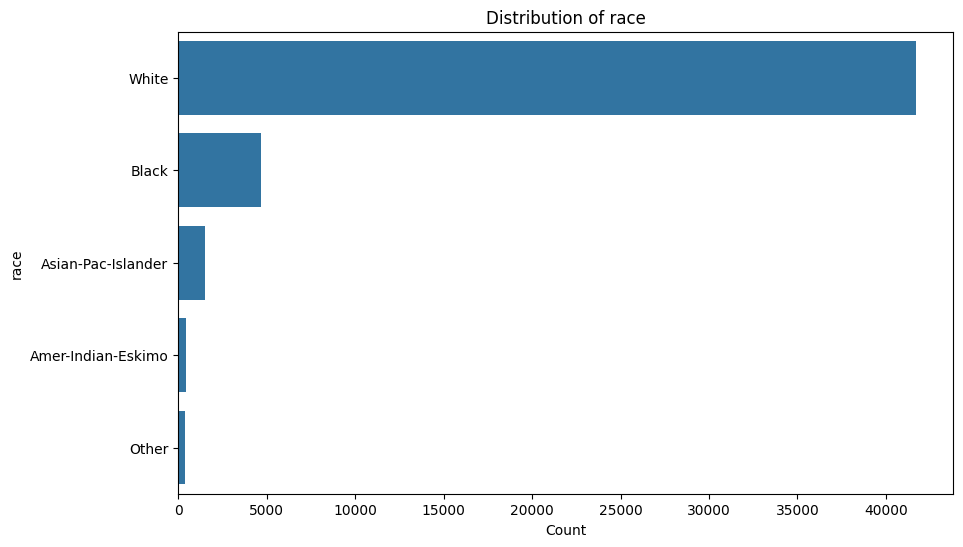

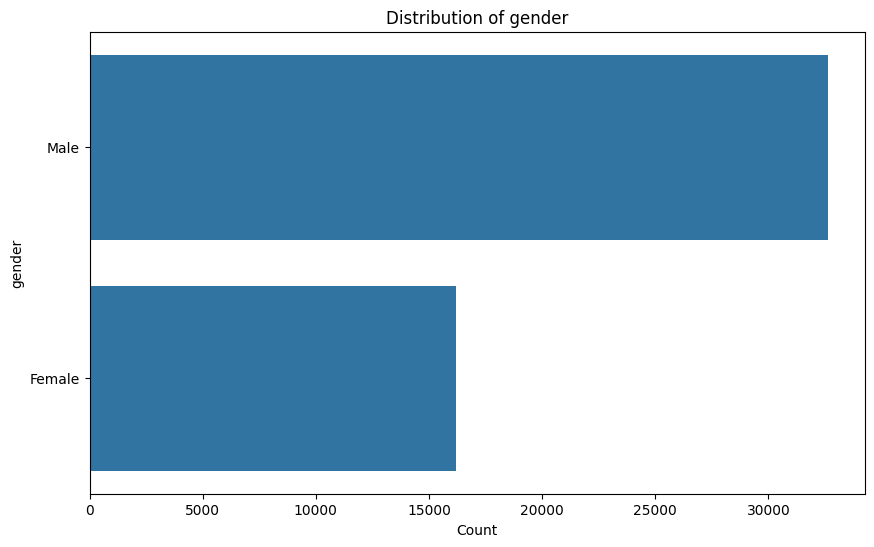

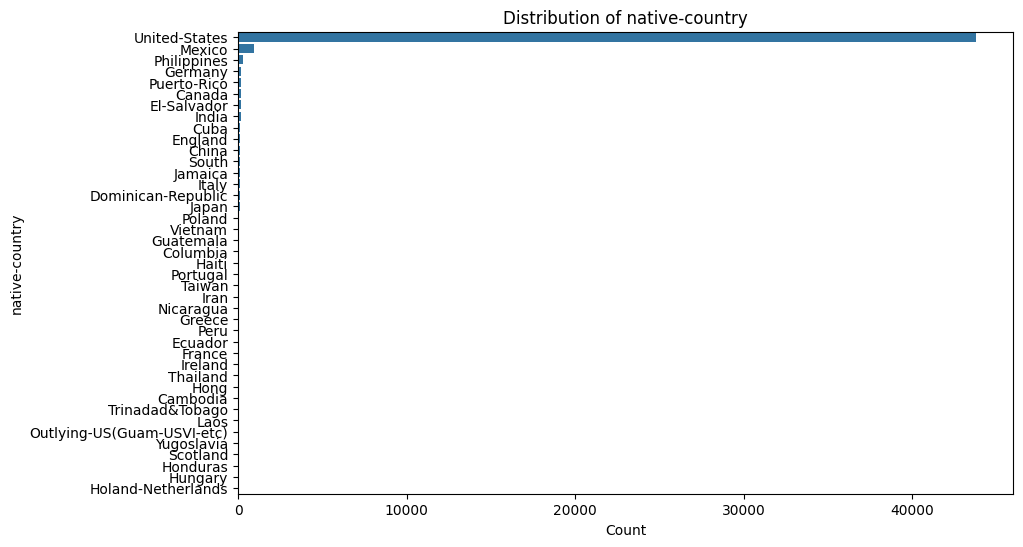

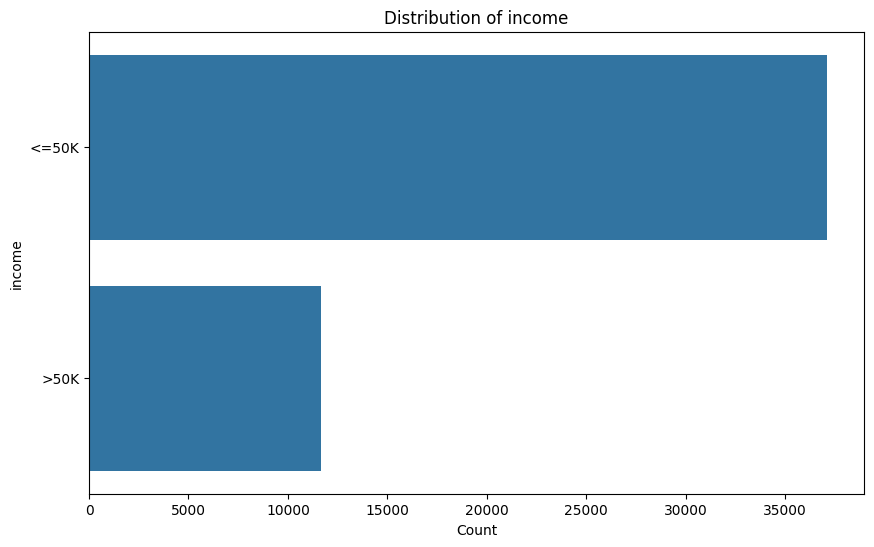

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms integrated with KDE for numerical features
for col in num_data:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True, bins=20, edgecolor='black')
    plt.title(f'Histogram of {col} with KDE')
    plt.xlabel(col)
    plt.ylabel('Frequency / Density')
    plt.show()

# Countplots for categorical features (acting as histograms of counts)
for col in cat_data:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=data[col], order = data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

In [ ]:
data.drop('capital-gain',axis=1,inplace=True)
data.drop('capital-loss',axis=1,inplace=True)

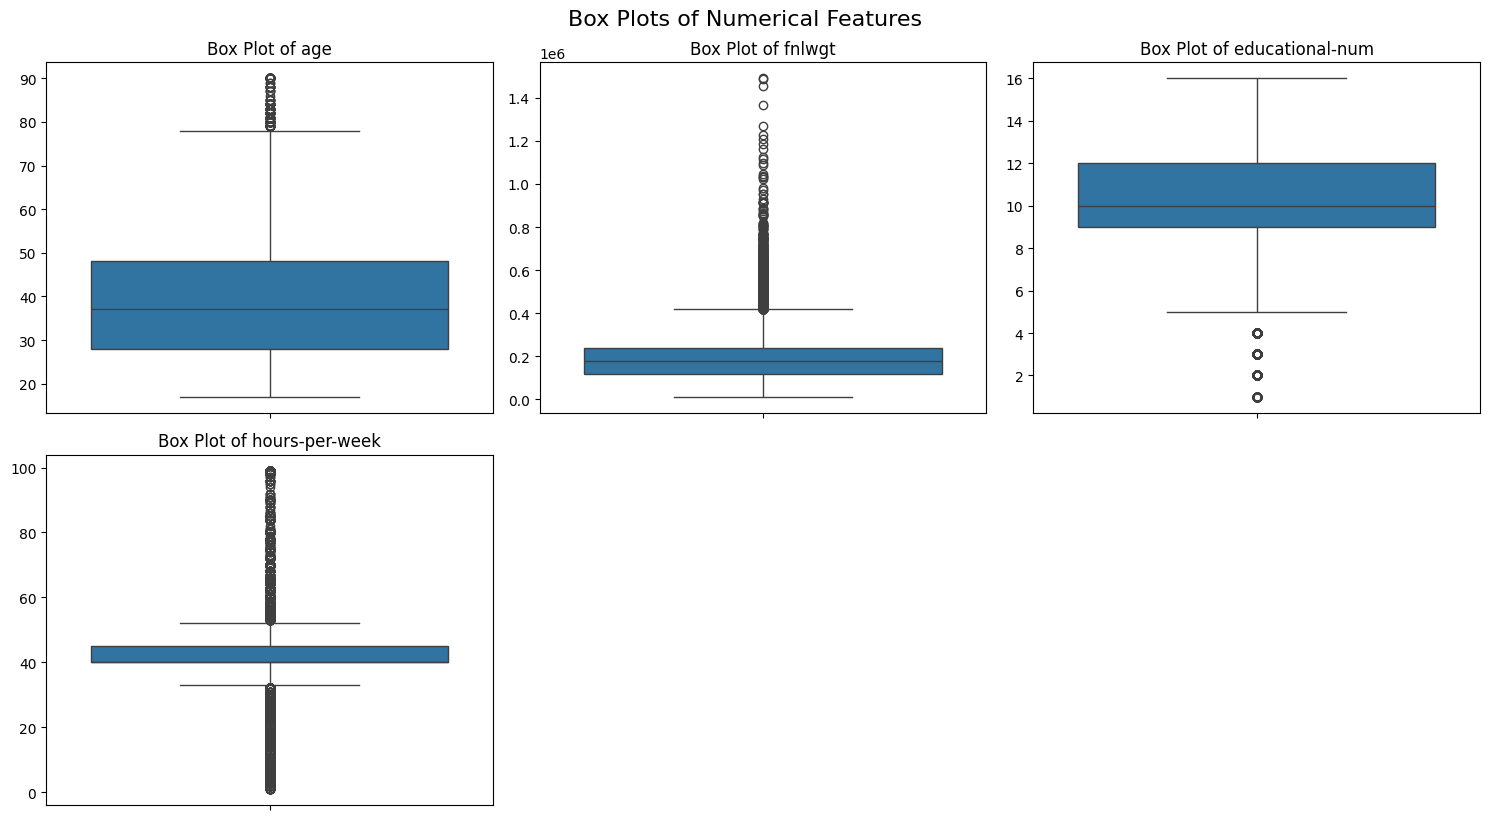

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Identify numerical columns currently in the DataFrame
num_cols_current = data.select_dtypes(include=np.number).columns.tolist()

# Determine the grid size for subplots
num_features = len(num_cols_current)
# Let's aim for 3 columns, adjust rows accordingly
n_cols = 3
n_rows = (num_features + n_cols - 1) // n_cols

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Loop through numerical columns and create a box plot for each
for i, col in enumerate(num_cols_current):
    sns.boxplot(y=data[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel('') # Remove y-label as it's redundant with title

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Box Plots of Numerical Features', y=1.02, fontsize=16)
plt.show()

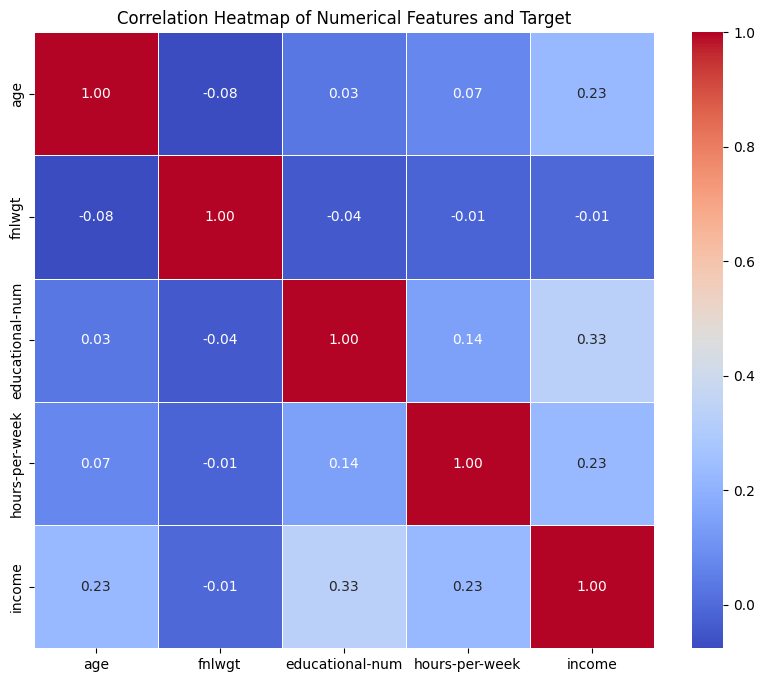

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame for correlation calculation to avoid modifying the original 'data'
df_corr = data.copy()

# Identify numerical columns in the current DataFrame
num_cols_current = df_corr.select_dtypes(include=np.number).columns.tolist()

target_column = 'income'

# Label encode the 'income' column in the temporary DataFrame for correlation
le_income = LabelEncoder()
df_corr[target_column] = le_income.fit_transform(df_corr[target_column])

# Combine numerical features and the encoded target column name
columns_to_correlate = num_cols_current + [target_column]

# Calculate the correlation matrix
correlation_matrix = df_corr[columns_to_correlate].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features and Target')
plt.show()

In [ ]:
data.drop('fnlwgt',axis=1,inplace=True)

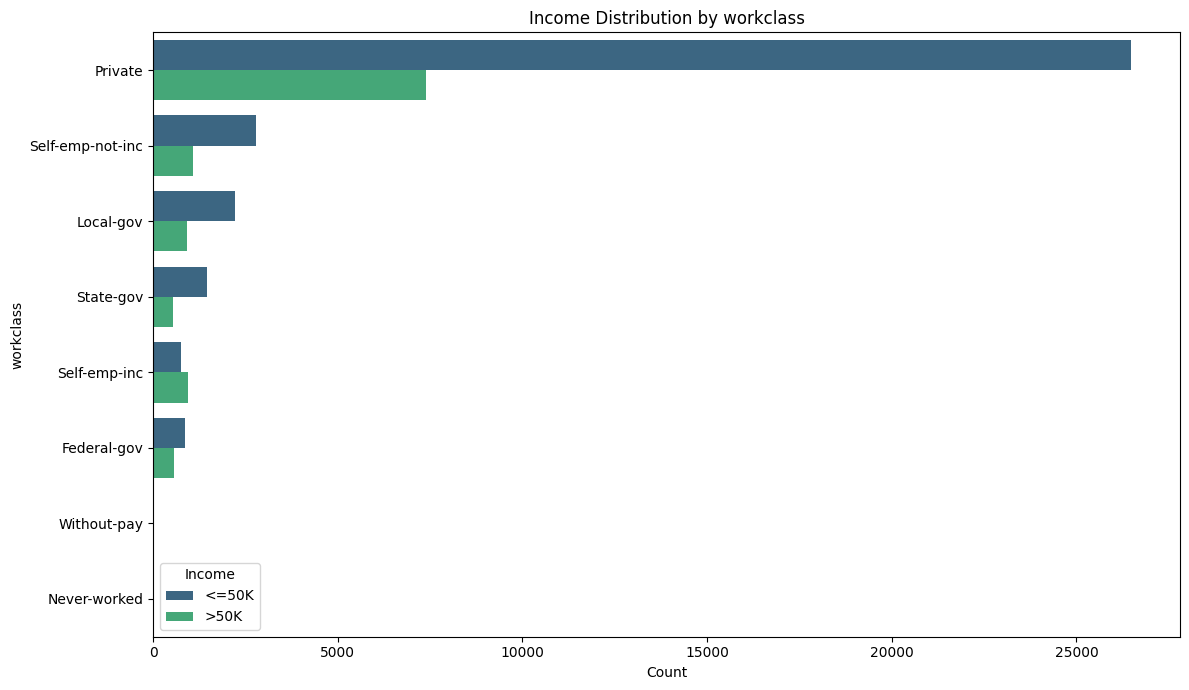

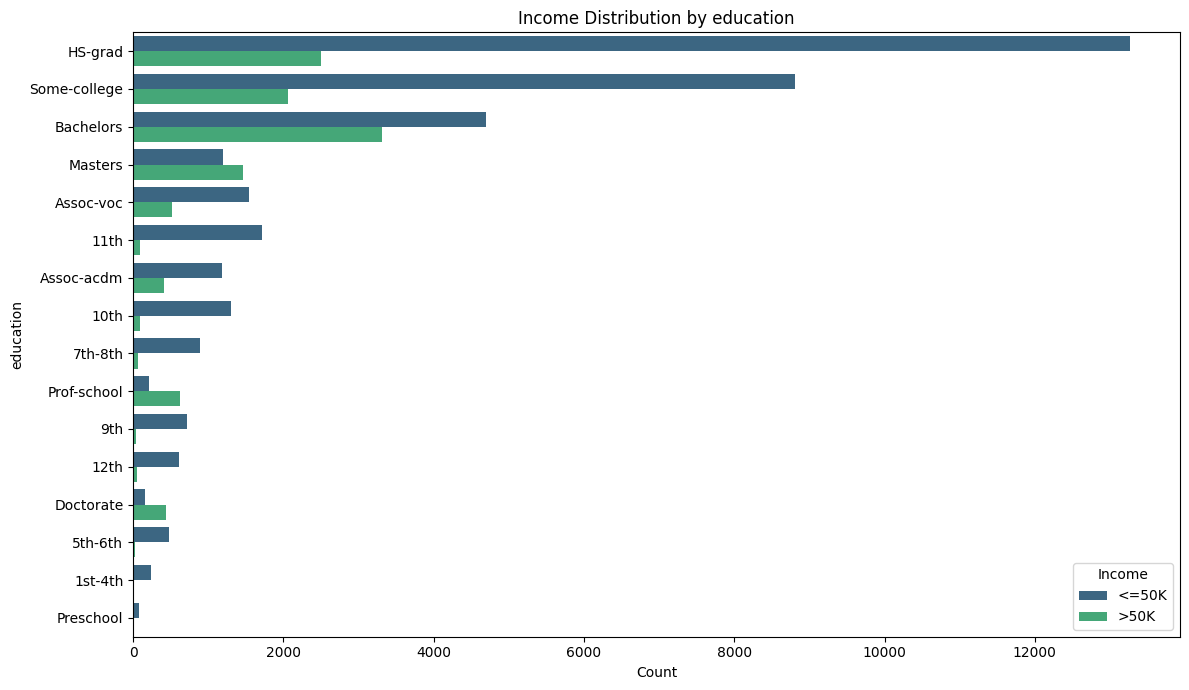

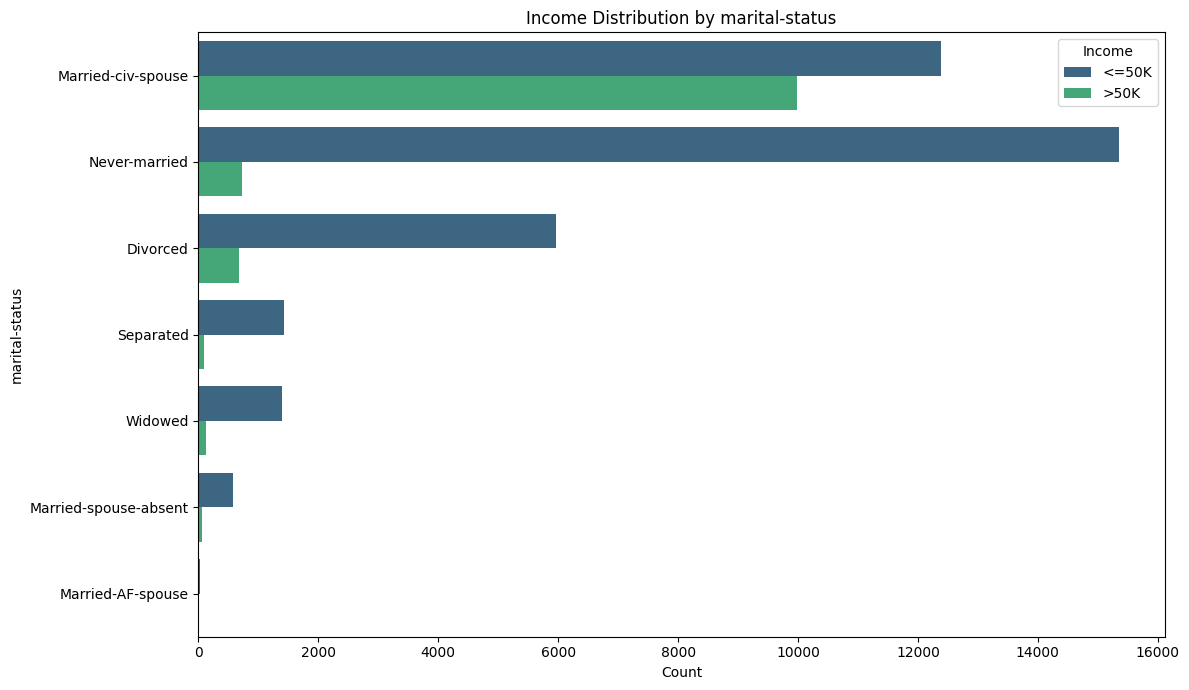

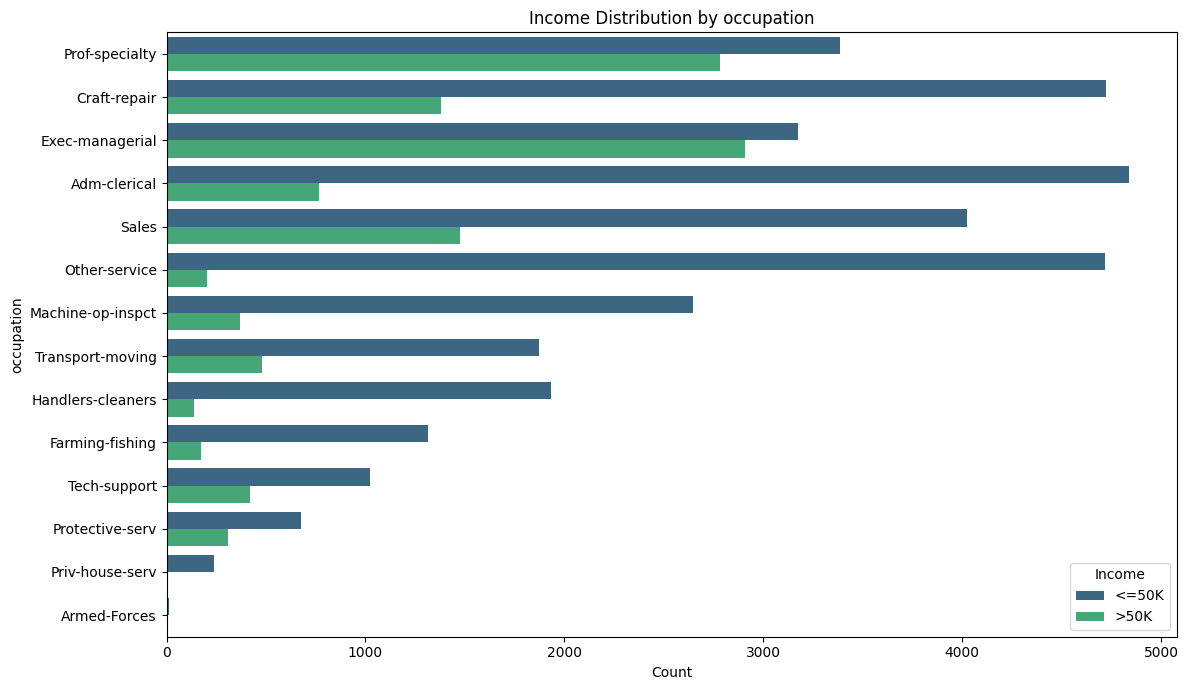

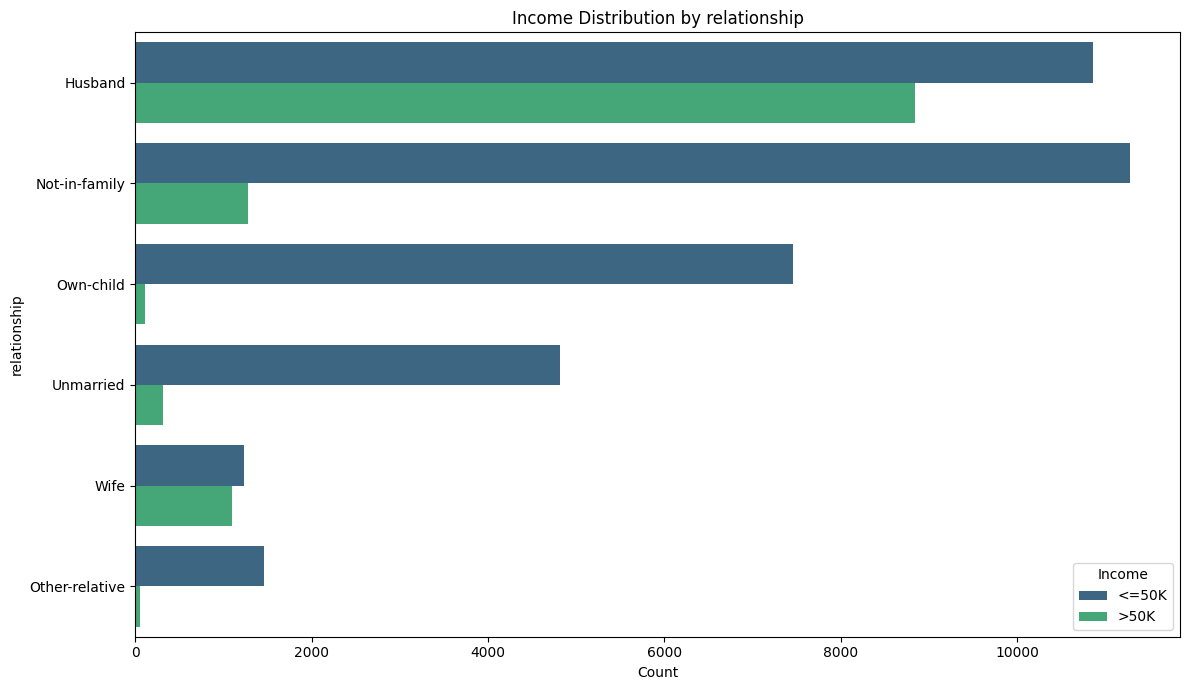

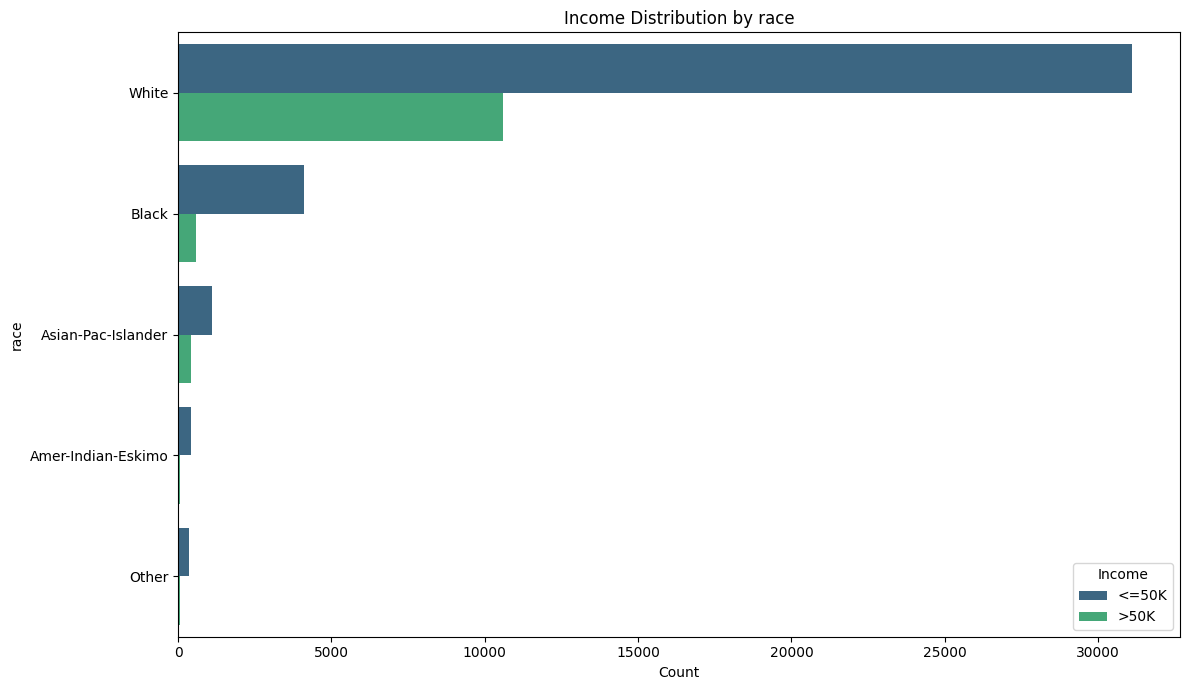

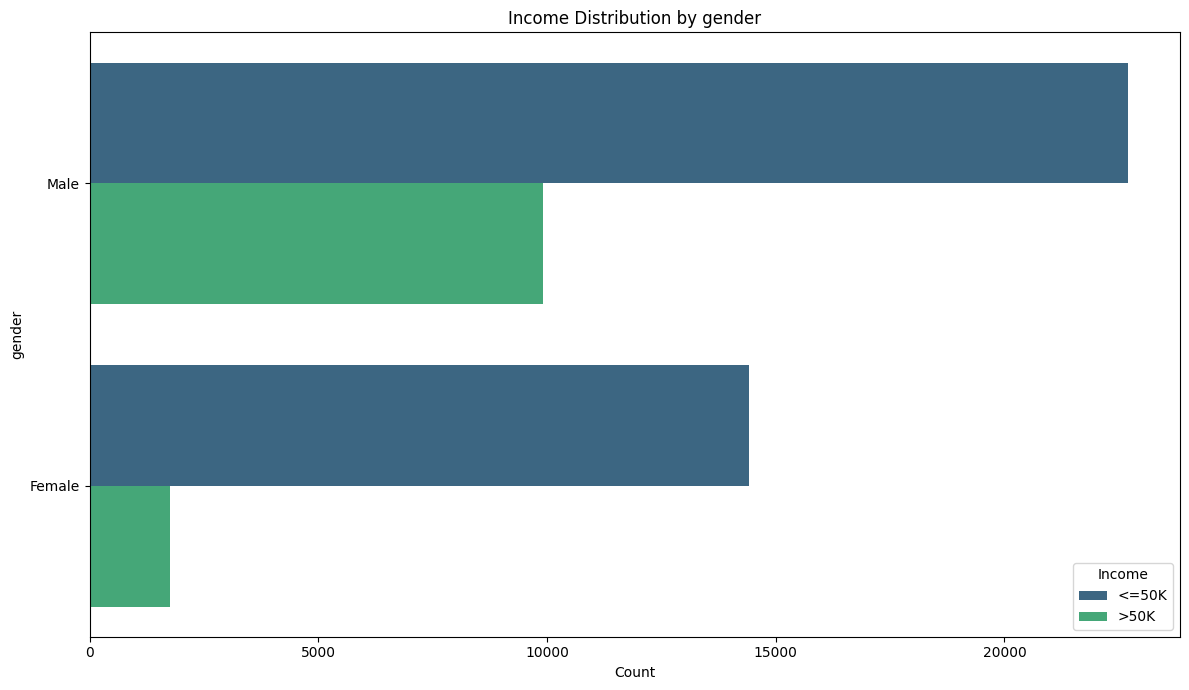

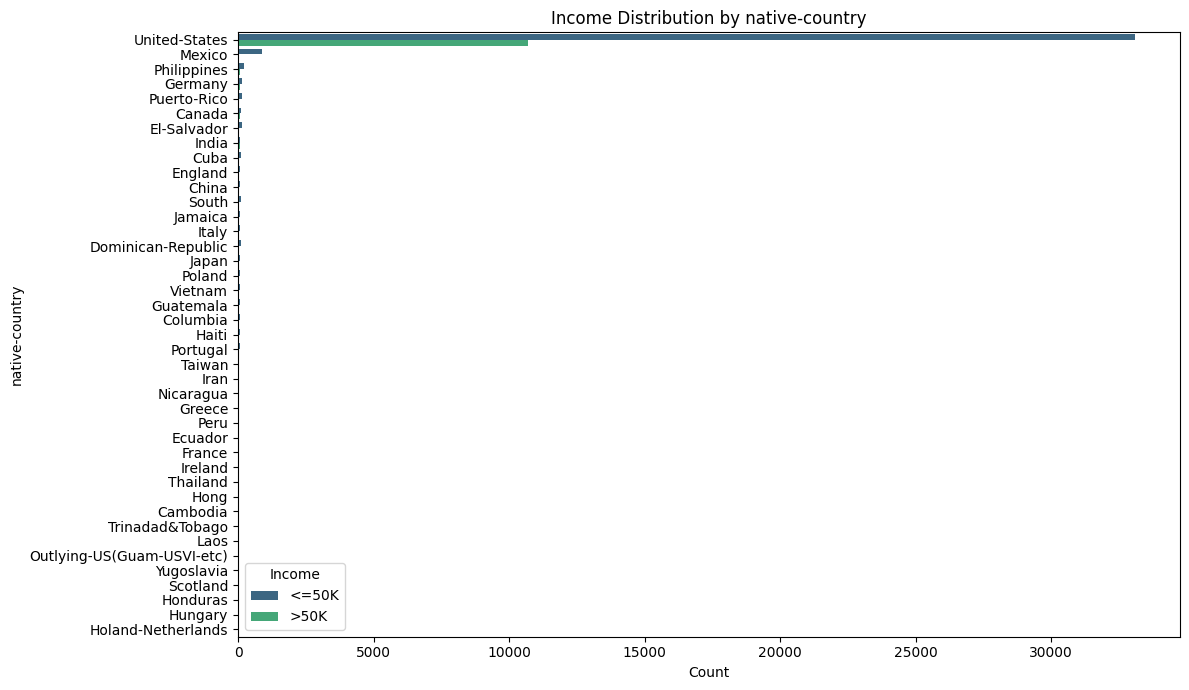

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns from the original list, excluding the target itself
cat_features_for_analysis = [col for col in cat_data if col != 'income']

# Loop through each categorical feature and create a countplot with income as hue
for col in cat_features_for_analysis:
    plt.figure(figsize=(12, 7))
    sns.countplot(y=data[col], hue=data['income'], palette='viridis', order = data[col].value_counts().index)
    plt.title(f'Income Distribution by {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.legend(title='Income')
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=data.drop('income',axis=1)
y=data['income']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

# **Handling Missing Values**



In [ ]:
data['workclass']=data['workclass'].fillna(data['workclass'].mode()[0])
data['occupation']=data['occupation'].fillna(data['occupation'].mode()[0])
data['native-country']=data['native-country'].fillna(data['native-country'].mode()[0])

#**Handling outliers**

In [ ]:
outlier_columns = ['hours-per-week']

for col in outlier_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    num_outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)].shape[0]
    print(f"Column '{col}': {num_outliers} outliers detected before capping.")

    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

    num_outliers_after = data[(data[col] < lower_bound) | (data[col] > upper_bound)].shape[0]
    print(f"Column '{col}': {num_outliers_after} outliers detected after capping.\n")

print("Outliers in specified columns have been handled using IQR-based capping.")

Column 'hours-per-week': 13486 outliers detected before capping.
Column 'hours-per-week': 0 outliers detected after capping.

Outliers in specified columns have been handled using IQR-based capping.


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols_X_train = X_train.select_dtypes(include='object').columns
for col in categorical_cols_X_train:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

le_y = LabelEncoder()
y_train = le_y.fit_transform(y_train)
y_test = le_y.transform(y_test)

X_train.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
13116,44,5,9,13,2,11,0,4,1,50,38
12057,22,6,9,13,4,9,3,4,0,20,38
41063,29,1,9,13,4,9,3,2,0,42,38
25025,22,1,11,9,4,5,2,4,1,50,38
4130,50,3,12,14,2,3,0,4,1,50,38


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
x

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States


In [ ]:
feature_columns = x.columns

X_train = pd.DataFrame(X_train,columns=feature_columns)
X_test = pd.DataFrame(X_test,columns=feature_columns)

In [ ]:
X_train

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
0,0.369863,0.625,0.600000,0.800000,0.333333,0.785714,0.0,1.0,1.0,0.500000,0.926829
1,0.068493,0.750,0.600000,0.800000,0.666667,0.642857,0.6,1.0,0.0,0.193878,0.926829
2,0.164384,0.125,0.600000,0.800000,0.666667,0.642857,0.6,0.5,0.0,0.418367,0.926829
3,0.068493,0.125,0.733333,0.533333,0.666667,0.357143,0.4,1.0,1.0,0.500000,0.926829
4,0.452055,0.375,0.800000,0.866667,0.333333,0.214286,0.0,1.0,1.0,0.500000,0.926829
...,...,...,...,...,...,...,...,...,...,...,...
39027,0.424658,0.375,0.600000,0.800000,0.666667,0.214286,0.2,1.0,0.0,0.346939,0.926829
39028,0.273973,0.375,0.733333,0.533333,0.333333,0.142857,0.0,1.0,1.0,0.397959,0.926829
39029,0.780822,0.625,0.733333,0.533333,0.333333,0.785714,0.0,1.0,1.0,0.193878,0.926829
39030,0.383562,0.375,0.600000,0.800000,0.000000,0.214286,0.2,1.0,0.0,0.397959,0.926829


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,accuracy_score
from sklearn import metrics,classification_report

ImportError: cannot import name 'accuracy_score' from 'sklearn.model_selection' (/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/__init__.py)

In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1, 30, 2))}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best 'k' (n_neighbors) found: {grid_search.best_params_['n_neighbors']}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

best_knn_model = grid_search.best_estimator_


Best 'k' (n_neighbors) found: 27
Best cross-validation accuracy: 0.8316


In [ ]:
y_train_pred = best_knn_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")


y_test_pred = best_knn_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\n--- Classification Report (Test Set) ---")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.8426
Test Accuracy: 0.8278

--- Classification Report (Test Set) ---
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7422
           1       0.66      0.57      0.61      2336

    accuracy                           0.83      9758
   macro avg       0.77      0.74      0.75      9758
weighted avg       0.82      0.83      0.82      9758

